In [16]:
!pip install pyspark scikit-learn


In [17]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, roc_auc_score

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Scaling and Encoding
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score


In [18]:
import pandas as pd

# Load the dataset into a pandas DataFrame
file_path = '/content/dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [19]:
df.isnull().sum()

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [20]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [21]:
df.shape

(248, 8)

# **Histogram for Distribution of Stock Prices**

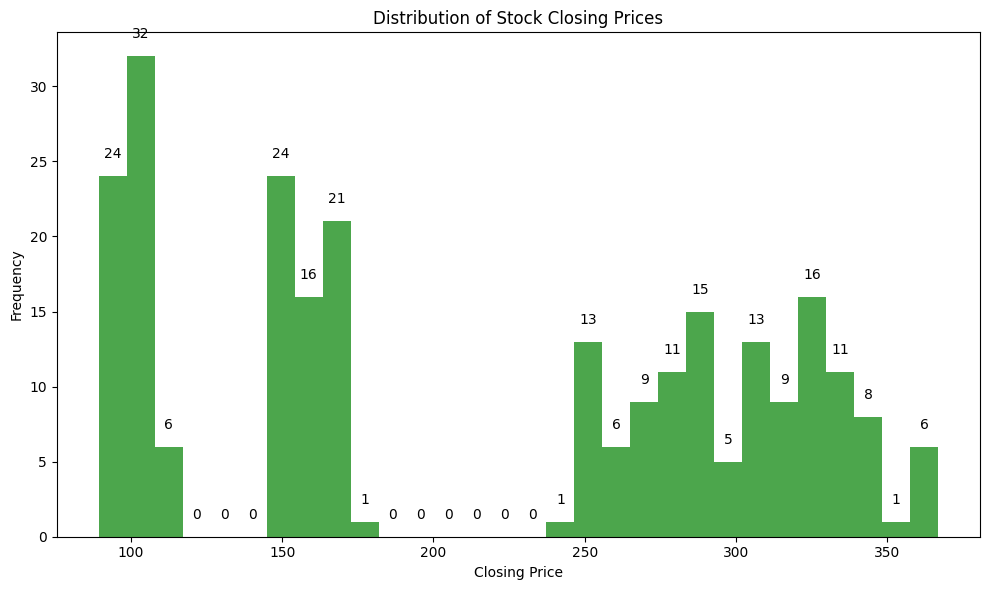

In [22]:
plt.figure(figsize=(10, 6))

# Create the histogram and get the patches for each bar
n, bins, patches = plt.hist(df['Close'], bins=30, color='green', alpha=0.7)

# Add labels to each bar in the histogram
for i in range(len(patches)):
    height = patches[i].get_height()  # Get the height of each bar
    # Adjust label placement: a small offset above the bar
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height + 1,
             f'{int(height)}',  # The frequency value
             ha='center', va='bottom', fontsize=10, color='black')  # Position and style of the label

# Add labels and title
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Stock Closing Prices')

# Adjust layout for proper visualization and show the plot
plt.tight_layout()
plt.show()


# **Correlation Heatmap Between Stock Features**

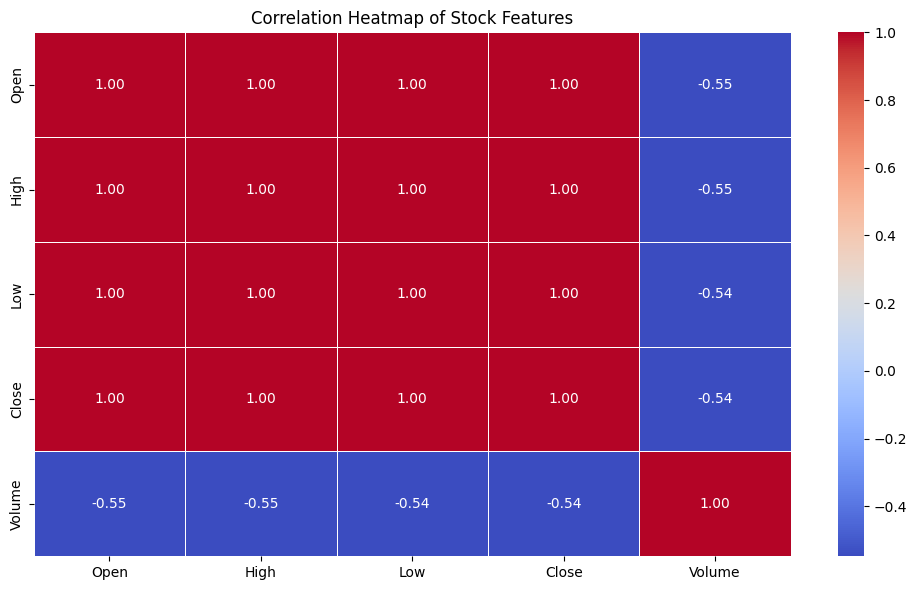

In [23]:
import seaborn as sns

# Correlation matrix
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Features')
plt.tight_layout()
plt.show()


# **Pairplot for Feature Relationships**

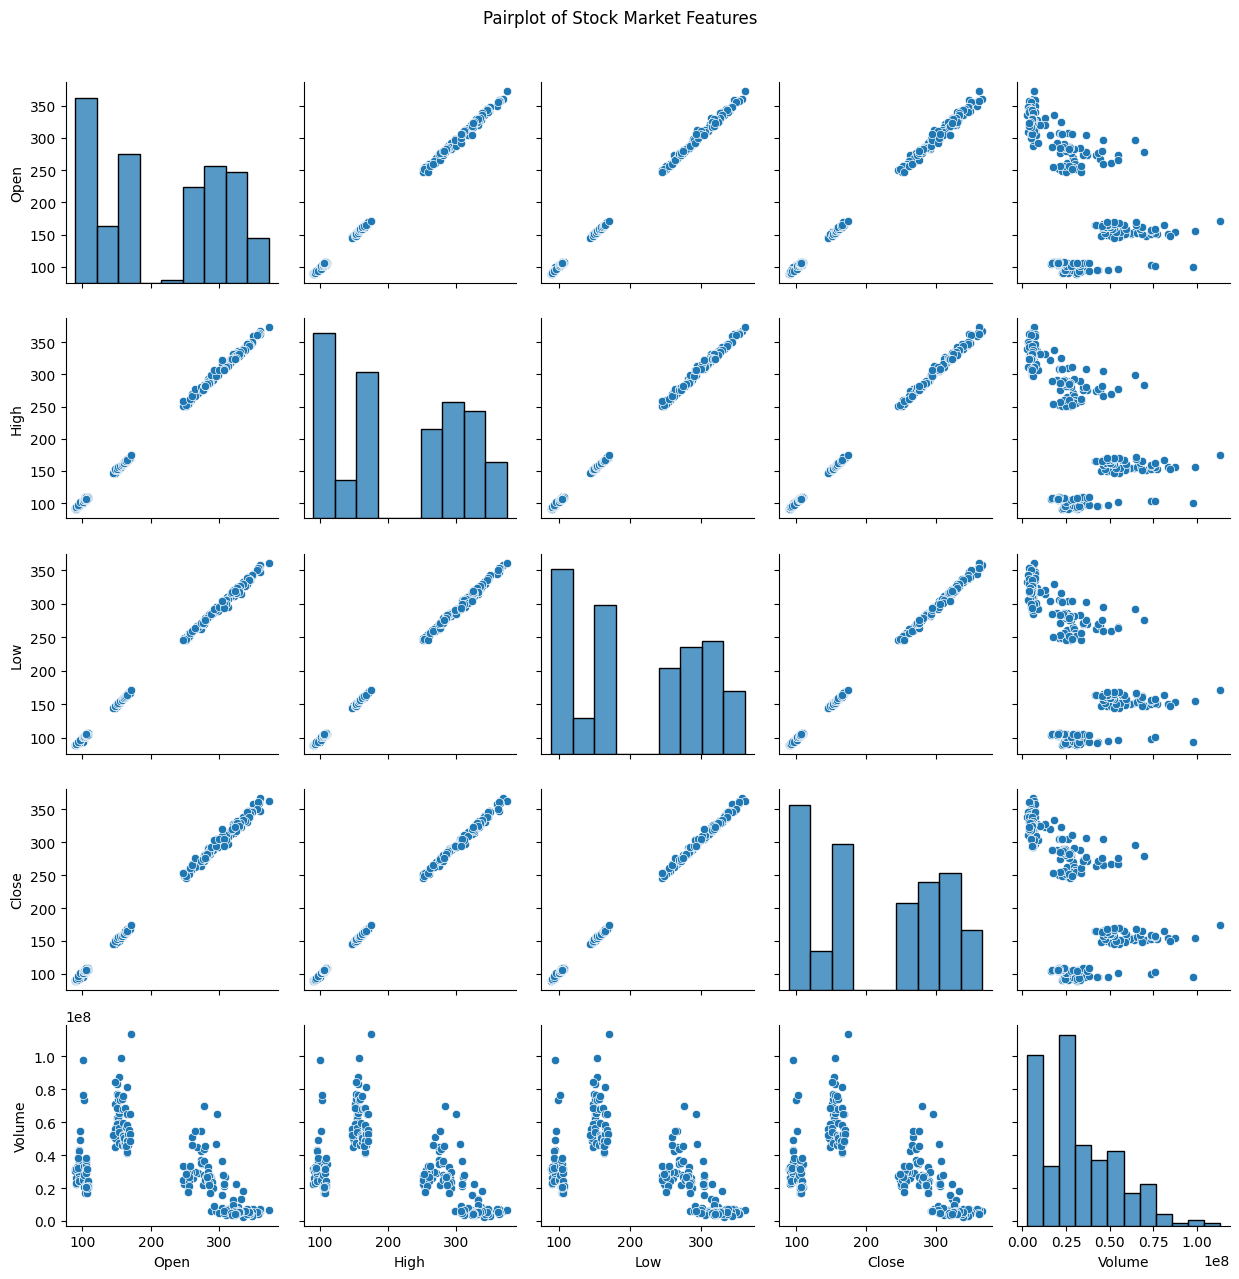

In [24]:
# Select relevant columns for pairplot
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Create the pairplot
sns.pairplot(df[features], height=2.5)
plt.suptitle('Pairplot of Stock Market Features', y=1.02)
plt.tight_layout()
plt.show()


In [25]:
df_cleaned = df.copy()
# Convert Date to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Calculate the 7-day moving average for the 'Close' price
df['7_day_MA'] = df['Close'].rolling(window=7, min_periods=1).mean()

# Encode categorical variables (stock tickers) using one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['Ticker'])

# **Splitting dataset into test and train**

In [27]:
from sklearn.model_selection import train_test_split
# Define features (X) and labels (y)
X = df[['Open', 'High', 'Low', 'Volume', '7_day_MA']]
y = df['Close']  # Target variable: Close price



# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **RandomForestRegressor**

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# calculate RMSE
mse = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse)

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)
# Print the results
print(f'Mean Absolute Error: {mae_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-squared: {r2_rf}')


Mean Absolute Error: 1.5767490417480485
Root Mean Squared Error: 2.1526334496517316
R-squared: 0.9994320205585258


# **XGBRegressor**

In [29]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the results for the XGBoost model
print(f'XGBoost Model - Mean Absolute Error: {mae_xgb}')
print(f'XGBoost Model - Root Mean Squared Error: {rmse_xgb}')
print(f'XGBoost Model - R-squared: {r2_xgb}')


XGBoost Model - Mean Absolute Error: 3.313045043945314
XGBoost Model - Root Mean Squared Error: 7.7790817175094995
XGBoost Model - R-squared: 0.9925826441532747


# **Comparison plot**

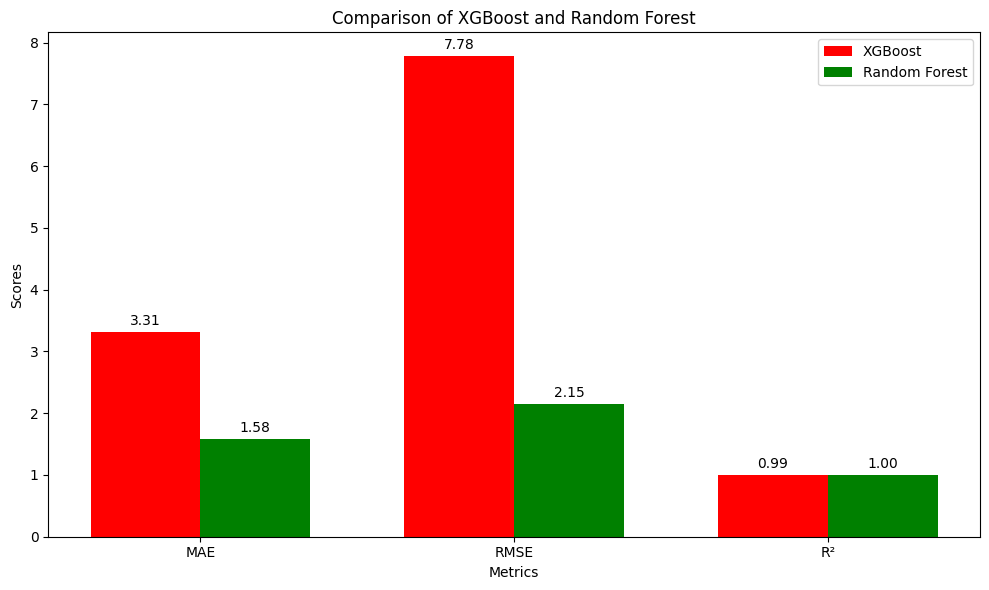

In [30]:
import matplotlib.pyplot as plt
# Metrics for plotting
metrics = ['MAE', 'RMSE', 'R²']

# Values for XGBoost and Random Forest
xgb_values = [mae_xgb, rmse_xgb, r2_xgb]
rf_values = [mae_rf, rmse_rf, r2_rf]

# Set the x-axis positions for the bar groups
x = np.arange(len(metrics))

# Bar width
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for XGBoost and Random Forest
bars1 = ax.bar(x - width/2, xgb_values, width, label='XGBoost', color='red')
bars2 = ax.bar(x + width/2, rf_values, width, label='Random Forest', color='green')

# Add value labels on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # format to 2 decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # position at the top of the bar
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')  # align at the center and above the bar

# Add value labels to both sets of bars
add_value_labels(bars1)
add_value_labels(bars2)

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of XGBoost and Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()